# LAB5 Logistic Regression Part2

### Part 2: In this part you will use LR as a classifier for diabetes prediction. Use part 1 as a guide.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.patches as mpatches
import operator

In [2]:
%matplotlib inline 

In [3]:
# logit function
def logit(x):  
    return np.log(x / (1-x))

### Logit Curve

Text(0, 0.5, 'Logit - L')

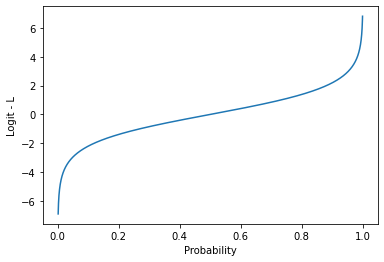

In [4]:
x = np.arange(0.001, 0.999, 0.0001)
y = [logit(n) for n in x]  # put all x values into logit func.
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

### Plot Sigmoid Curve

Text(0, 0.5, 'Probability')

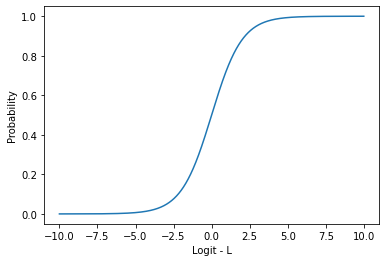

In [5]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

### Load the datasets

In [6]:
diabetes = pd.read_csv("diabetes.csv")

In [7]:
diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### Data Cleaning check

In [8]:
print(diabetes.isnull().sum())

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [9]:
diabetes.columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'] 

In [10]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### Data Exploration 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98111bd4f0>,
      dtype=object)

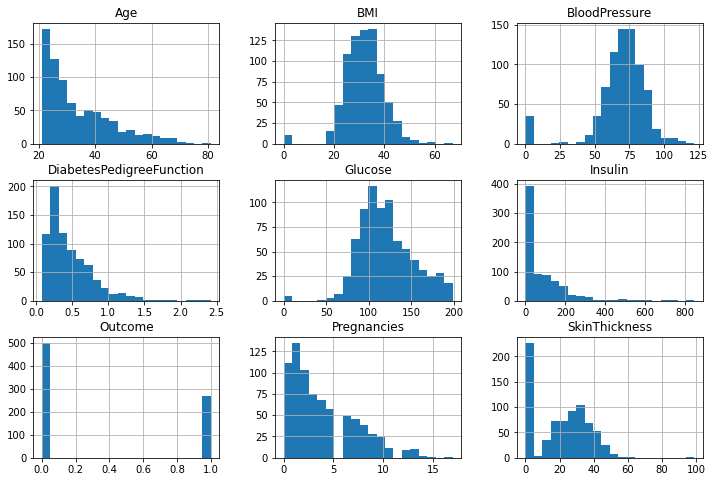

In [11]:
diabetes.hist(figsize=(12,8),bins=20)

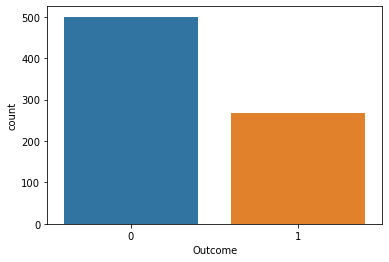

In [12]:
diabetes.groupby("Outcome").size()
sns.countplot(diabetes["Outcome"], label="Count")

In [13]:
correlation = diabetes.corr()
display(correlation)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Glucose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodPressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiabetesPedigreeFunction,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


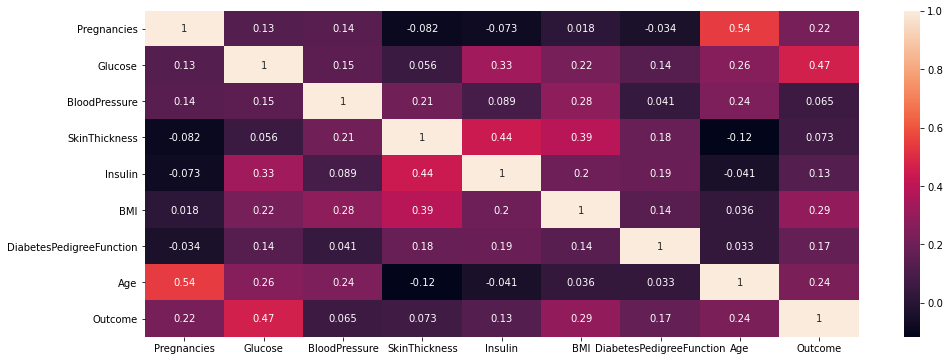

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(diabetes.corr(),annot=True)

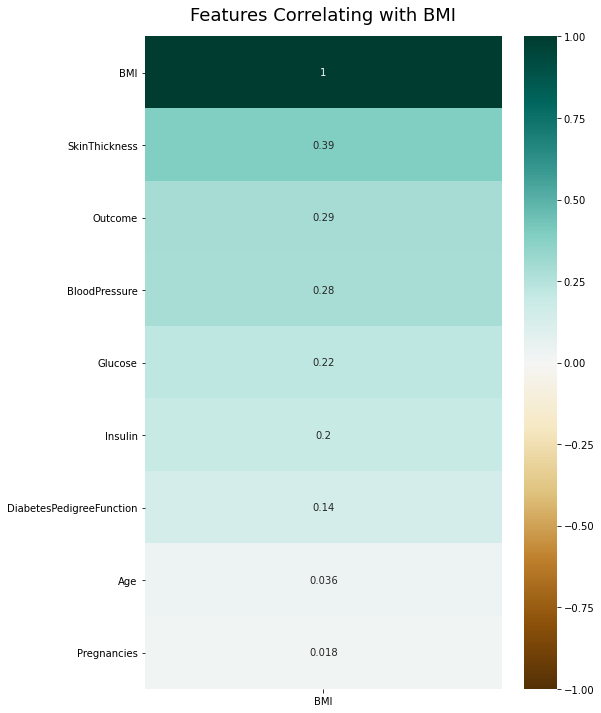

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(diabetes.corr()[['BMI']].sort_values(by='BMI', ascending=False), 
                                                                                                                     vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with BMI', fontdict={'fontsize':18}, pad=16);

### Based on Correlation heatmap, table, Glucose, BMI, and Age are top3 of strongest correlation with diabetes

### How to change DataFrame to Array

In [16]:
data = {'Name':['Hideki','Savanah','Kate'],
              'Age': [24, 23, 24],
               'Nationality':['Japan','Syria','philippines']}

df1 = pd.DataFrame(data)
display(df1)

,Name,Age,Nationality
0,Hideki,24,Japan
1,Savanah,23,Syria
2,Kate,24,philippines


In [17]:
np_array = df1.to_numpy()
display(np_array)

array([['Hideki', 24, 'Japan'],
       ['Savanah', 23, 'Syria'],
       ['Kate', 24, 'philippines']], dtype=object)

In [18]:
df1[['Age']].to_numpy()

array([[24],
       [23],
       [24]])

### How to change Array to Dataframe

In [19]:
arr = np.random.rand(4, 3) 
print("Numpy array:") 
print(arr) 

# convert numpy array to dataframe 
df = pd.DataFrame(arr, columns =['A', 'B', 'C']) 
print("\nPandas DataFrame: ") 
df 

Numpy array:
[[0.68403517 0.19546514 0.48913268]
 [0.06575988 0.19757814 0.14993203]
 [0.51691883 0.51474375 0.56490621]
 [0.80140918 0.14753289 0.84574864]]

Pandas DataFrame: 


,A,B,C
0,0.684035,0.195465,0.489133
1,0.065760,0.197578,0.149932
2,0.516919,0.514744,0.564906
3,0.801409,0.147533,0.845749


### Change diabetes dataframe to array

In [20]:
diabetes_array = diabetes.to_numpy()

In [21]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


** feature selections index (i-1)  
x[target1][0].append(data[i][0])   Number of timesPregnant  
x[target1][1].append(data[i][1])   Plasma Glucose concentration  
x[target1][1].append(data[i][2])   Diastolic Blood Pressure  
x[target1][1].append(data[i][3])   Triceps skin fold thickness  
x[target1][1].append(data[i][4])   2-hrs serun insulin  
x[target1][1].append(data[i][5])   Body mass index (IBM)  
x[target1][1].append(data[i][6])   Diabetes pedigree function   
x[target1][1].append(data[i][7])   Age of Patient ( in years)   
x[target1][1].append(data[i][8])   Class variable. 1for diabetic and 0 for non-diabetic.  

In [22]:
diabetes_array
data = diabetes_array[:,0:8] # select all features and exclude 'Outcome'  #[all rows : from Columns index[0] : Columns index[8]]
data

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [23]:
# get Outcomes 
target = diabetes_array[:, 8]
target

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [24]:
# POINT

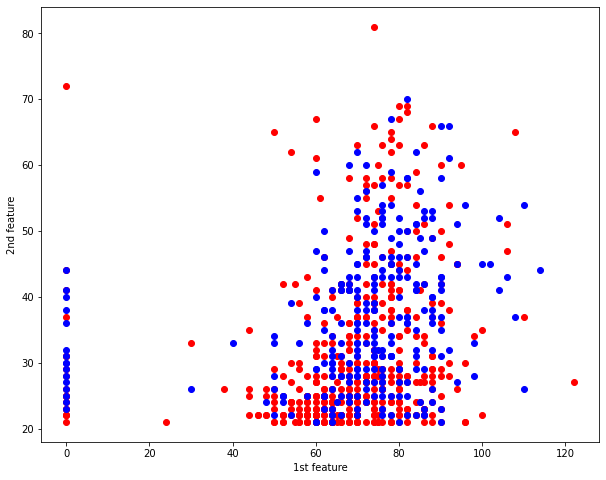

In [25]:
x = []
for target1 in range(2):
    x.append([[], []])
    for i in range(len(data)):                                  #target is 0 or 1
        if target[i] == target1:
            x[target1][0].append(data[i][2])         # **first feature: 
            x[target1][1].append(data[i][7])         # **second feature: 
            
colours = ("r", "b")                                              # r = malignant(有害), b = benign(無害)
fig = plt.figure(figsize=(10,8))                          #10,8 for default size
ax = fig.add_subplot(111)
for target1 in range(2):
    ax.scatter(x[target1][0],
               x[target1][1],
               c=colours[target1])

    ax.set_xlabel("1st feature")
ax.set_ylabel("2nd feature")

plt.show() #shows the scatter plot of ”　　　　”vs　“　　　” 

### Plotting in 3D

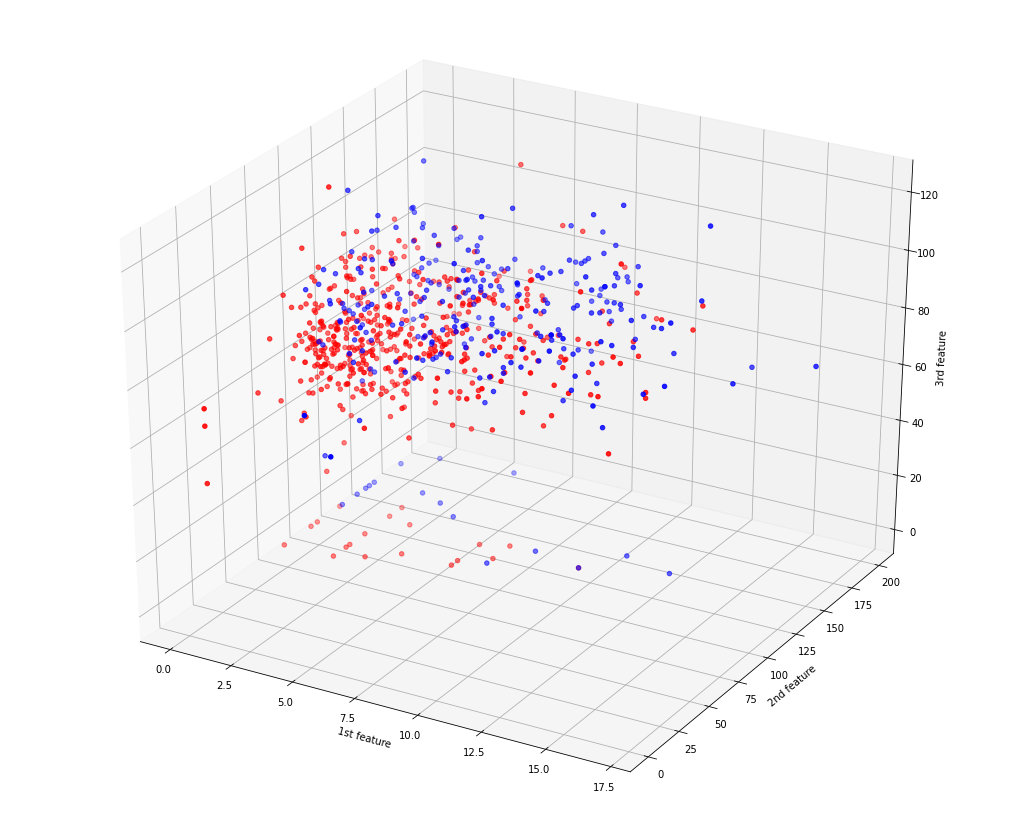

In [26]:
x = []
for target1 in range(2):
    x.append([[], [],[]])
    for i in range(len(data)):                                  #target is 0 or 1
        if target[i] == target1:
            x[target1][0].append(data[i][0])         # **first feature: 
            x[target1][1].append(data[i][1])         # **second feature: 
            x[target1][2].append(data[i][2])         # **third feature: 
            
colours = ("r", "b")                                              # r = malignant(有害), b = benign(無害)
fig = plt.figure(figsize=(18,15))                          #10,8 for default size
ax = fig.add_subplot(111, projection ='3d')
for target1 in range(2):
    ax.scatter(x[target1][0],
                       x[target1][1],
                       x[target1][2],
                       c=colours[target1])

ax.set_xlabel("1st feature")
ax.set_ylabel("2nd feature")
ax.set_zlabel("3rd feature")
plt.show() #shows the scatter plot of ”　　　　”vs　“　　　” 

Jupyter Notebook displays the 3D plot statistically. As you can see on the graph above, you can't really have a good relationships between the three features.

### Training  Using One Feature

Let's now use logistic regression to try to predict if high Glucose level is diabetic. To get started, let's use only the 2nd feature of the dataset: Glucose. The following code snippet plots a scatter plot showing if a tumor is malignant or benign based on the Glucose level:

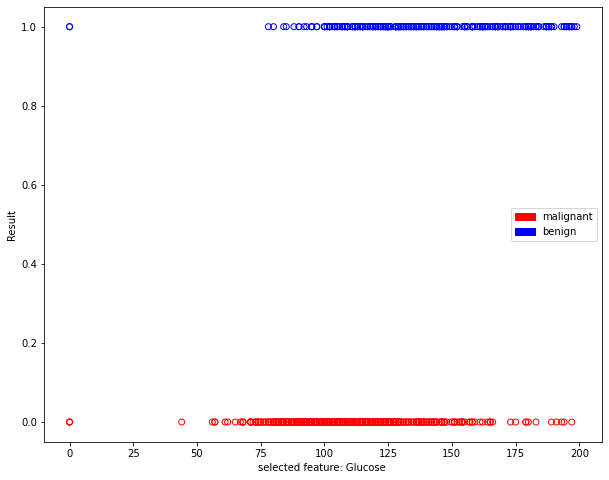

In [27]:
x= data[:,1]              # choose feature
y= target                  # 0: malignant,1:benign
colors = {0:'red', 1:'blue'}     # 0: malignant,1:benign

fig = plt.figure(figsize=(10,8))  
plt.scatter(x,y,
            facecolors ='none',
            edgecolors = pd.DataFrame(target)[0].apply(lambda x:
colors[x]),
            cmap = colors)

plt.xlabel("selected feature: Glucose ")
plt.ylabel("Result")

red = mpatches.Patch(color='red', label='malignant')
blue= mpatches.Patch(color='blue', label='benign')

plt.legend(handles=[red, blue], loc=5)

In [28]:
x

array([ 85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110., 168.,
       139., 189., 166., 100., 118., 107., 103., 115., 126.,  99., 196.,
       119., 143., 125., 147.,  97., 145., 117., 109., 158.,  88.,  92.,
       122., 103., 138., 102.,  90., 111., 180., 133., 106., 171., 159.,
       180., 146.,  71., 103., 105., 103., 101.,  88., 176., 150.,  73.,
       187., 100., 146., 105.,  84., 133.,  44., 141., 114.,  99., 109.,
       109.,  95., 146., 100., 139., 126., 129.,  79.,   0.,  62.,  95.,
       131., 112., 113.,  74.,  83., 101., 137., 110., 106., 100., 136.,
       107.,  80., 123.,  81., 134., 142., 144.,  92.,  71.,  93., 122.,
       163., 151., 125.,  81.,  85., 126.,  96., 144.,  83.,  95., 171.,
       155.,  89.,  76., 160., 146., 124.,  78.,  97.,  99., 162., 111.,
       107., 132., 113.,  88., 120., 118., 117., 105., 173., 122., 170.,
        84.,  96., 125., 100.,  93., 129., 105., 128., 106., 108., 108.,
       154., 102.,  57., 106., 147.,  90., 136., 11

As you can see, this is a good opportunity to use logistic regression to predict if a feature has an correlation with diabetes 

### Finding the Intercept and Coefficient 

Scikit-learn comes with the LogisticRegression class that allows you to apply logistic regression to train model. Thus, in this example, you are going to train a model using the first featureof the dataset:

In [29]:
log_regress = linear_model.LogisticRegression()

# -- train the model -- 

log_regress.fit(X = np.array(x).reshape(len(x),1),  # first X is Cap letter, second is small
                y = y)

# -- print trained model intercept -- 
print('Logistic Regression Intercept is:', log_regress.intercept_)

# --print trained model coefficients -- 
print('Logistic Regression Coefficient is:', log_regress.coef_)


Logistic Regression Intercept is: [-5.34080148]
Logistic Regression Coefficient is: [[0.03777406]]


Once the model is trained, what we are most interested in at this point is the intercept and coefficient. The intercept is $\beta_0$ and the coefficient is x$\beta$. Knowing these two values allows us to plot the sigmoid cirve that tries to fit the points on the chart

Text(0, 0.5, 'Probability')

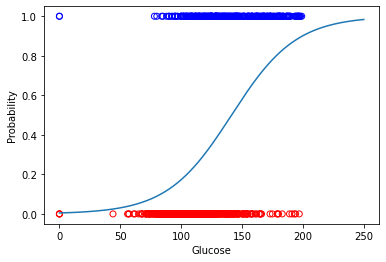

In [30]:
def sigmoid(x):
    return(1/ (1+ np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] *x)))))

x1 = np.arange(0, 250, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
            facecolor='none',
            edgecolors=pd.DataFrame(target)[0].apply(lambda x: colors[x]),
                                                                           cmap=colors)

plt.plot(x1,y1)
plt.xlabel("Glucose")
plt.ylabel("Probability")

The sigmoid curve fitting to the two sets of points

### Making Predictions

Using the trained model, let's try to make some predictions. Let's try to predict the result if the Glucose is 120:

In [31]:
print('LR intercept when Glucose: 120: ', log_regress.predict_proba([[120]]))
print('LR coefficient when Glucose: 120: ', log_regress.predict([[120]])[0])

LR intercept when Glucose: 120:  [[0.69166488 0.30833512]]
LR coefficient when Glucose: 120:  0.0


As you can see from the output, the predict_proba() function in the first statement returns a two-dimentional array. The result of 0.69166488 indicates the probability that the prediction is 0(malignant) while the result of 0.30833512 indicates the probability that prediction is 1. Based on the default threshold of 0.5, the prediction is that the tumor is galignant(value of 0),since its predicted probability(0.69166488) of 0 is more than 0.30833512. The predict() function in the second statement returns the class that the result lies in (which in this case can be a 0 or 1). The result of 0 indicates that the prediction is that the tumor is malignant.

 Try another example with the Glucose: 135 this time:

In [32]:
print('LR intercept when Glucose: 152: ', log_regress.predict_proba([[152]]))
print('LR coefficient when Glucose: 152: ', log_regress.predict([[152]])[0])

LR intercept when Glucose: 152:  [[0.40110679 0.59889321]]
LR coefficient when Glucose: 152:  1.0


### Traning the Model Using All Features 

Instead of training the model using all of the rows in the dataset, you are going to split it into two sets, one for training and one for testing. To do so, you use the train_test_split() function. This function allows you to split your data into random train and test subsets. The following code snippet splits the dataset into a 75 percent training and 25 percent testing set:

In [33]:
# from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                            data,              #all features
                            target,            # labels
                            test_size = 0.35,         # labels
                            random_state = 2,         # set random seed
                            stratify = target)  # randomize based on labels

In [34]:
# from sklearn import linear_model

x = train_set[:,0:8]    # All 8 features 
y = train_labels         # 0: malignant, 1: benign

log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)

/Users/hidenaka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print('LR Intercept after trained all features: ', log_regress.intercept_)
print('LR Coefficient after trained all features: ', log_regress.coef_)

LR Intercept after trained all features:  [-6.78146678]
LR Coefficient after trained all features:  [[ 0.12272675  0.02817365 -0.01118115  0.00727035 -0.00205254  0.06588155
   1.09492283  0.00740415]]


In this lab, we're training it with all the 8 features in the dataset:

### Testing The Model

In [36]:
# get a predicted probabilities and convert into a dataframe
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

In [37]:
# assign column names to prediction
preds_prob.columns = ["Malignant", "Benign"]

In [38]:
# get the predicted class labels
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

In [39]:
# actual diagnosis
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

In [40]:
# Merge the three dataframes into one
result = pd.concat([preds_prob, preds_class, original_result], axis =1)
print(result.head())

   Malignant    Benign  Prediction  Original Result
0   0.611385  0.388615         0.0              0.0
1   0.704721  0.295279         0.0              0.0
2   0.156429  0.843571         1.0              1.0
3   0.781503  0.218497         0.0              0.0
4   0.819627  0.180373         0.0              0.0


The result of the predictions are then printed out.
The predictions and original diagnosis are displayed side by side for rasy comparison.

### Getting the Confusion Matrix

In [41]:
# generate table of predictions vs actual
print("--- confusion Matrix ---")
print(pd.crosstab(preds, test_labels))

--- confusion Matrix ---
col_0  0.0  1.0
row_0          
0.0    160   43
1.0     15   51


In [42]:
# --- view the confusion matrix -- 
print(metrics.confusion_matrix(y_true = test_labels,
                               y_pred = preds))

[[160  15]
 [ 43  51]]


(0 for malignant and 1 for benign)  
- True Positive(TP): The model correctly predicts the outcome as positive.  In this example, the number of TP(87) indicates the number of correct predictions that a tumor is benign.
- True Negative(TN): The model correctly predicts the outcome as negative.  In this example, tumors were correctly predicted to be malignant.
-  False Positibe(FP): The model is incorrectly predicted the outcome as positibe, but the actual result is negatibe. In this example, it means that the tumor is actually malignant, but the model predicted the tumor to be benign.
-  False Negative(FN): The model is incorrectly predicted the outcomes as negative, but the actual result is positive.  In this example, it means that the tumor is actually, benign, but the model predicted the tumor to be malignant. 

In [43]:
#--- get the accuracy of the prediction ----
print("--- Accuracy ----")
print(log_regress.score(X = test_set,
                        y = test_labels))

--- Accuracy ----
0.7843866171003717


In [44]:
# View summary of common classfication metrics
print("--- Metrices----")

print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

--- Metrices----
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       175
         1.0       0.77      0.54      0.64        94

    accuracy                           0.78       269
   macro avg       0.78      0.73      0.74       269
weighted avg       0.78      0.78      0.77       269



Higher in False Positive: Model falsely decide it diabetic as a result even though it's not diabetic 

### Receiving Operating Characteristic (ROC) Curve

With so many metrics  available, what is an easy way to examine the effectiveness of an algorithm?  One way would be to plot a curve known as the Receiver Operating Characteristic(ROC) curve. The ROC curve is created by plotting the TPR against the FPR at various threshold settings.

Default threshold of 0.5 (meaning that all of those predicted probabilities less than or equal to 0.5 belong to one class, while those greater than 0.5 belong to another class).

In [45]:
# find the predicted probabilities using the test set

probs = log_regress.predict_proba(test_set)
preds = probs[:,1]

# find the FPR, TPR, and threshold
fpr, tpr, threshold  = roc_curve(test_labels, preds)


In [46]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.01142857 0.01142857 0.01714286 0.01714286
 0.02285714 0.02285714 0.02857143 0.02857143 0.03428571 0.03428571
 0.04       0.04       0.05142857 0.05142857 0.05714286 0.05714286
 0.08571429 0.08571429 0.09142857 0.09142857 0.09714286 0.09714286
 0.10285714 0.10285714 0.12571429 0.12571429 0.13142857 0.13142857
 0.13714286 0.13714286 0.14285714 0.14285714 0.14857143 0.14857143
 0.15428571 0.15428571 0.17714286 0.17714286 0.19428571 0.19428571
 0.20571429 0.20571429 0.21142857 0.21142857 0.24       0.24
 0.25142857 0.25142857 0.29142857 0.29142857 0.30285714 0.30285714
 0.31428571 0.31428571 0.32       0.32       0.37142857 0.37142857
 0.38285714 0.38285714 0.44571429 0.44571429 0.45714286 0.45714286
 0.50285714 0.50285714 0.50857143 0.50857143 0.58857143 0.58857143
 0.62857143 0.62857143 0.64571429 0.64571429 0.68       0.68
 0.81714286 0.81714286 1.        ]
[0.         0.0106383  0.0106383  0.14893617 0.14893617 0.15957447
 0.15957447 0.35106383 0.35106383 0.425

### Plotting the ROC and Finding the Area Under the Curve (AUC)

In [47]:
# find the area under the curve
roc_auc = auc(fpr, tpr)

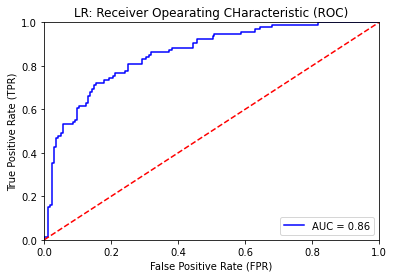

In [48]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('LR: Receiver Opearating CHaracteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test and the areas under ROC curves are used to compare the usefulness of tests.  Generally, aim for the algorithm with the highest AUC.

### What is ROC and AUC?

2 値分類で一般的に利用されているパフォーマンスを計測するための可視化手法です。  
ROC は推測曲線と呼ばれ縦軸にTPR(True Positive Rate)、横軸にFPR(False Positive Rate) の割合をプロットしたものです。   
AUC(Area Under the Curve) はその曲線の下部分の面のことで、AUC の面積が大きいほど一般的に機械学習の性能が良い事を意味します。  
面積が大きいということはすなわち機械学習モデルがNegative と推測すべきものを間違えてPositive と推測している傾向が少なく、Positive と推測すべきものをしっかりとPositive と推測できている状態です。  
https://qiita.com/TsutomuNakamura/items/ef963381e5d2768791d4 

### What is F1 score

### What do I need to improve the model?

Add some regularization or PCA the features 